In [ ]:
#필요한 라이브러리 import
import numpy as np
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers import Flatten, Convolution2D, MaxPooling2D
from keras.models import load_model
import cv2
import os
import tensorflow as tf

In [ ]:
#카테고리명
categories = ['가', '각', '간', '갇', '갈', '갉', '갊', '감', '갑', '값', '갓', '갔', '강', '갖', '갗', '같', '갚', '개', '객', '갠', '갤', '갬', '갭', '갯', '갰', '갱', '갸', '갹', '걍', '걔', '걘', '걜', '거', '걱', '건', '걷', '걸', '걺', '검', '겁', '것', '겄', '겅', '겉', '겊', '게', '겐', '겔', '겜', '겝', '겟', '겠', '겡', '겨', '격', '겪', '견', '겯', '결', '겸', '겹', '겻', '겼', '경', '곁', '계', '곗', '고', '곡', '곤', '곧', '골', '곪', '곬', '곯', '곰', '곱', '곳', '공', '곶', '과', '곽', '관', '괄', '괌', '괍', '괏', '광', '괘', '괜', '괩', '괭', '괴', '굉', '교', '굔', '굘', '굡', '굣', '구', '국', '군', '굳', '굴', '굵', '굶', '굻', '굼', '굽', '굿', '궁', '궂', '궈', '궉', '근', '귿', '글', '긁', '금', '급', '긋', '긍', '긔', '기', '긱', '긴', '긷', '길', '긺', '김', '깁', '깃', '깅', '깆', '깊', '까', '깍', '깎', '깐', '깔', '깖', '깜', '깝', '깟', '깠', '깡', '깥', '깨', '깩', '깬', '깰', '깸', '깹', '깻', '깼', '깽', '꺄', '꺅', '꺌', '꺼', '꺽', '꺾', '껀', '껄', '껌', '껍', '껏', '껐', '껑', '께', '껙', '껜', '껨', '껫', '껭', '껴', '껸', '껼', '꼇', '꼈', '꼍', '꼐', '꼬', '꼭', '꼰', '꼲', '꼴', '꼼', '꼽', '꼿', '꽁', '꽂', '꽃', '꽈', '꽉', '꽐', '꽜', '꽝', '꽤', '꽥', '꽹', '꾀', '꾄', '꾈', '꾐', '꾑', '꾕', '꾜', '꾸', '꾹', '꾼', '꿀', '꿇', '꿈', '꿉', '꿋', '꿍', '꿎', '꿔', '꿜', '꿨', '꿩', '꿰', '꿱', '꿴', '꿸', '뀀', '뀁', '뀄', '뀌', '뀐', '뀔', '뀜', '뀝', '뀨', '끄', '끅', '끈', '끊', '끌', '끎', '끓', '끔', '끕', '끗', '끙', '끝', '끼', '끽', '낀', '낄', '낌', '낍', '낏', '낑']

In [ ]:
#npy파일 업로드
num_classes = len(categories)

X_train, X_test, Y_train, Y_test = np.load('/content/drive/Shareddrives/dataset/dddd.npy',allow_pickle=True)

X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((277515, 28, 28), (92506, 28, 28), (277515,), (92506,))

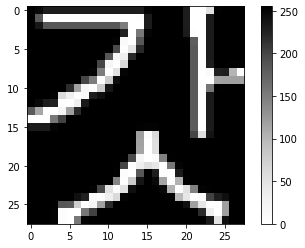

In [ ]:
import matplotlib.pyplot as plt
import sys

plt.imshow(X_train[0], cmap = 'Greys')
plt.colorbar()
plt.show()

#데이터 정규화
X_train = X_train / 255.0
X_test = X_test/ 255.0

X_train[0]

In [ ]:
print(Y_train[0])
#레이블(원핫인코딩)
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=260)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=260)
Y_train[0]

10


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(260, activation='softmax') #각각 노드 260개 두고 층 분리
]) #다항분류이기 때문에 softmax를 사용

model.compile(loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 260)               33540     
Total params: 134,020
Trainable params: 134,020
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 6. 모델 학습
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.25)

Epoch 1/10
6505/6505 [==============================] - 29s 4ms/step - loss: 1.0411 - accuracy: 0.7303 - val_loss: 0.2560 - val_accuracy: 0.9257
Epoch 2/10
6505/6505 [==============================] - 25s 4ms/step - loss: 0.1777 - accuracy: 0.9475 - val_loss: 0.1718 - val_accuracy: 0.9439
Epoch 3/10
6505/6505 [==============================] - 23s 4ms/step - loss: 0.1106 - accuracy: 0.9660 - val_loss: 0.0883 - val_accuracy: 0.9720
Epoch 4/10
6505/6505 [==============================] - 22s 3ms/step - loss: 0.0871 - accuracy: 0.9720 - val_loss: 0.0843 - val_accuracy: 0.9727
Epoch 5/10
6505/6505 [==============================] - 25s 4ms/step - loss: 0.0711 - accuracy: 0.9773 - val_loss: 0.0635 - val_accuracy: 0.9805
Epoch 6/10
6505/6505 [==============================] - 24s 4ms/step - loss: 0.0628 - accuracy: 0.9795 - val_loss: 0.0699 - val_accuracy: 0.9778
Epoch 7/10
6505/6505 [==============================] - 23s 3ms/step - loss: 0.0567 - accuracy: 0.9816 - val_loss: 0.0562 - val_ac

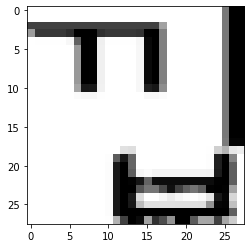

정답 :  낍
예측결과 :  낍


In [ ]:
ex = 200

plt.imshow(X_test[ex], cmap='gray')
plt.show()

pre = model.predict(X_test[ex:ex+1])
print('정답 : ', categories[Y_test[ex].argmax()])
print('예측결과 : ', categories[pre.argmax()])


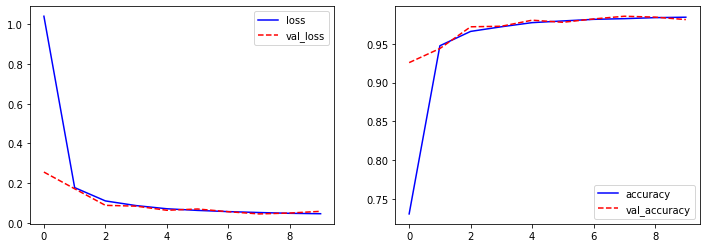

In [ ]:
# 7. 학습 결과 시각화

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-', label='accuracy')
plt.plot(history.history['val_accuracy'],'r--', label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

2891/2891 [==============================] - 4s 1ms/step - loss: 0.0557 - accuracy: 0.9823


[0.05569436028599739, 0.9822822213172913]

In [ ]:
from keras.models import load_model

model.save('ㄱ_model.h5')